# A-B_Testing

At its simplest, A/B testing is a method for comparing 2 versions of something against each other to discover which is the most successful. The something can be an image, a button, a headline, or beyond.

### Business Problem:

Facebook recently introduced a new bidding type, 'average bidding',
as an alternative to the existing bidding type called 'maximum bidding'.
One of our clients, Company_X, decided to test this new feature and
would like to do an A/B test to see if average bidding converts more than maximum bidding.
The A/B test has been going on for 1 month and Company_X is now
waiting for to analyze the results of this A/B test.
The ultimate success criterion for Company_X is Purchase.
Therefore, the focus should be on the Purchase metric for statistical testing.<br>

In this data set, which includes the website information of a company,
there is information such as the number of advertisements that users see
and click, as well as earnings information from here. There are two separate
data sets, the Control and Test group. These datasets are in separate sheets
of the ab_testing.xlsx excel. Maximum Bidding was applied to the control group
and Average Bidding was applied to the test group.

#### Data Features:
Impression: Ad views<br>
Click: Number of clicks on the displayed ad<br>
Purchase: The number of products purchased after the ads clicked<br>
Earning: Earnings after purchased products<br>

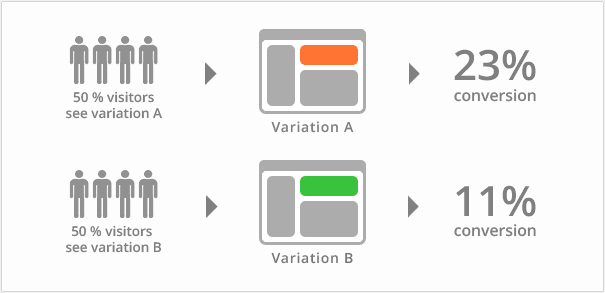

## 1. Importing the Libraries and Uploading Dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, shapiro, mannwhitneyu, f_oneway, levene, kendalltau, ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.stats.api as sms

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df_max_bid = pd.read_excel('ab_testing.xlsx', 'Control Group')
df_avg_bid = pd.read_excel('ab_testing.xlsx', 'Test Group')

In [3]:
df_max_bid.head()

,Impression,Click,Purchase,Earning
0,82529.459,6090.077,665.211,2311.277
1,98050.452,3382.862,315.085,1742.807
2,82696.024,4167.966,458.084,1797.827
3,109914.400,4910.882,487.091,1696.229
4,108457.763,5987.656,441.034,1543.720


In [4]:
df_avg_bid.head()

,Impression,Click,Purchase,Earning
0,120103.504,3216.548,702.160,1939.611
1,134775.943,3635.082,834.054,2929.406
2,107806.621,3057.144,422.934,2526.245
3,116445.276,4650.474,429.034,2281.429
4,145082.517,5201.388,749.860,2781.698


## 2. General Information About Dataset

In [5]:
# let's define a function for getting general information from a dataset.
def gen_info(df, box=True, column="Purchase"):
    print("###############################    Shape  ##################################")
    print(df.shape)
    print("###############################    Types  ##################################")
    print(df.dtypes)
    print("###############################    Head   ##################################")
    print(df.head())
    print("###############################    Tail   ##################################")
    print(df.tail())
    print("###############################    NA     ##################################")
    print(df.isnull().sum())
    print("############################### Quantiles ##################################")
    print(df.describe([0.01, 0.05, 0.50, 0.95, 0.99]).T)
    print("############################### BOX PLOT  ##################################")
    if box == True:
        sns.boxplot(x=df[column])
        print(plt.show())

###############################    Shape  ##################################
(40, 4)
###############################    Types  ##################################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
###############################    Head   ##################################
   Impression    Click  Purchase  Earning
0   82529.459 6090.077   665.211 2311.277
1   98050.452 3382.862   315.085 1742.807
2   82696.024 4167.966   458.084 1797.827
3  109914.400 4910.882   487.091 1696.229
4  108457.763 5987.656   441.034 1543.720
###############################    Tail   ##################################
    Impression    Click  Purchase  Earning
35  132064.219 3747.158   551.072 2256.976
36   86409.942 4608.256   345.046 1781.358
37  123678.934 3649.074   476.168 2187.721
38  101997.494 4736.353   474.614 2254.564
39  121085.881 4285.179   590.406 1289.309
###############################    NA     ##############################

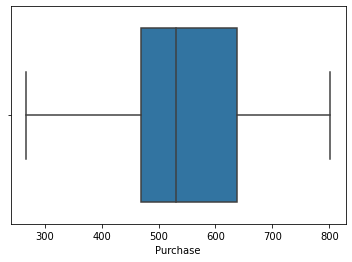

None


In [6]:
gen_info(df_max_bid)

###############################    Shape  ##################################
(40, 4)
###############################    Types  ##################################
Impression    float64
Click         float64
Purchase      float64
Earning       float64
dtype: object
###############################    Head   ##################################
   Impression    Click  Purchase  Earning
0  120103.504 3216.548   702.160 1939.611
1  134775.943 3635.082   834.054 2929.406
2  107806.621 3057.144   422.934 2526.245
3  116445.276 4650.474   429.034 2281.429
4  145082.517 5201.388   749.860 2781.698
###############################    Tail   ##################################
    Impression    Click  Purchase  Earning
35   79234.912 6002.214   382.047 2277.864
36  130702.239 3626.320   449.825 2530.841
37  116481.873 4702.782   472.454 2597.918
38   79033.835 4495.428   425.359 2595.858
39  102257.454 4800.068   521.311 2967.518
###############################    NA     ##############################

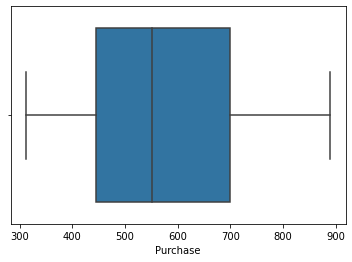

None


In [7]:
gen_info(df_avg_bid)

It seems there are no missing values or outliers in the datasets.

## 3. Concat the frames before A-B Testing

In [8]:
df_max_bid["Group"] = "Max"
df_max_bid.head()

,Impression,Click,Purchase,Earning,Group
0,82529.459,6090.077,665.211,2311.277,Max
1,98050.452,3382.862,315.085,1742.807,Max
2,82696.024,4167.966,458.084,1797.827,Max
3,109914.400,4910.882,487.091,1696.229,Max
4,108457.763,5987.656,441.034,1543.720,Max


In [9]:
df_avg_bid["Group"] = "Avg"
df_avg_bid.head()

,Impression,Click,Purchase,Earning,Group
0,120103.504,3216.548,702.160,1939.611,Avg
1,134775.943,3635.082,834.054,2929.406,Avg
2,107806.621,3057.144,422.934,2526.245,Avg
3,116445.276,4650.474,429.034,2281.429,Avg
4,145082.517,5201.388,749.860,2781.698,Avg


In [10]:
# Merging datasets
df = pd.concat([df_max_bid, df_avg_bid],ignore_index=True)
df

,Impression,Click,Purchase,Earning,Group
0,82529.459,6090.077,665.211,2311.277,Max
1,98050.452,3382.862,315.085,1742.807,Max
2,82696.024,4167.966,458.084,1797.827,Max
3,109914.400,4910.882,487.091,1696.229,Max
4,108457.763,5987.656,441.034,1543.720,Max
...,...,...,...,...,...
75,79234.912,6002.214,382.047,2277.864,Avg
76,130702.239,3626.320,449.825,2530.841,Avg
77,116481.873,4702.782,472.454,2597.918,Avg
78,79033.835,4495.428,425.359,2595.858,Avg


## 4. Defining the A/B Test Hypothesis

H0: M1 = M2

H0: There is **no** statistically significant difference between the average purchase earned, by the maximum bidding strategy and the average bidding strategy.

H1: M1 != M2

H1:  There is statistically significant difference between the average purchase earned, by the maximum bidding strategy and the average bidding strategy.

In [11]:
print(" Mean of purchase of maximum bidding group: %.4f" %df_max_bid['Purchase'].mean(), "\n",
      "Mean of purchase of average bidding group: %.4f"  %df_avg_bid['Purchase'].mean())

 Mean of purchase of maximum bidding group: 550.8941 
 Mean of purchase of average bidding group: 582.1061


In [12]:
# or we can check this information with new df using groupby
df.groupby('Group').agg({'Purchase' : ['mean', 'median']})

Purchase        
          mean  median
Group                 
Avg    582.106 551.356
Max    550.894 531.206

Mean purchase values of Avg and Max bidding seem different, but is it really? :)

We do not know whether this difference is statistically significant. To understand this, we must apply hypothesis testing.

## 5. Performing Hypothesis Testing

Let's check the assumptions before testing the hypothesis.

These are Assumption of **Normality** and **Homogeneity** of Variance. We have to test separately whether the control and test group comply with the normality assumption through the Purchase variable.

### 5.1 Normality Assumption

H0: There is no statistically significant difference between sample distribution and theoretical normal distribution<br>
H1: There is statistically significant difference between sample distribution and theoretical normal distribution 

p-value < 0.05 (H0 rejected)<br>
p-value > 0.05 (H0 not rejected)

In [13]:
tstat, pval = shapiro(df.loc[df["Group"] == "Avg", 'Purchase'])
print('Test Stat = %.4f, p-value = %.4f' % (tstat, pval)) # p-value is not less than 0.05

Test Stat = 0.9589, p-value = 0.1541


In [14]:
tstat, pval = shapiro(df.loc[df["Group"] == "Max", 'Purchase'])
print('Test Stat = %.4f, p-value = %.4f' % (tstat, pval)) # p-value is not less than 0.05

Test Stat = 0.9773, p-value = 0.5891


Since the p value is not less than 0.05, the assumption of normality is provided.

### 5.2 Variance Assumption

H0: the compared groups have equal variance.<br>
H1: the compared groups do not have equal variance. 

p-value < 0.05 (H0 rejected)<br>
p-value > 0.05 (H0 not rejected)

In [15]:
tstat, pvalue = levene(df.loc[df["Group"] == "Avg", 'Purchase'],
                        df.loc[df["Group"] == "Max", 'Purchase'])
print('Test Stat = %.4f, p-value = %.4f' % (tstat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


Since the p value is not less than 0.05, the assumption of variance is provided.

Both assumptions are provided (the distribution was Normal + Variance is Homogeneous) so, we will use parametric T-test using ttest_ind from scipy.stats lib

### 5.3 Independent two-sample t-test (parametric test)

In [16]:
test_stat, pvalue = ttest_ind(df.loc[df["Group"] == "Avg", 'Purchase'],
                           df.loc[df["Group"] == "Max", 'Purchase'],
                              equal_var=True) # false if the assumption of homogeneity of variance is not satisfied.

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9416, p-value = 0.3493


p-value > 0.05 (H0 not rejected). Our H0 was:

H0: M1 = M2

H0: There is no statistically significant difference between the average purchase earned, by the maximum bidding strategy and the average bidding strategy.

So, There is no statistically significant purchase difference between, maximum and average bidding types.

#### Bonus: mannwhitneyu test if assumptions are not provided (non-parametric test)

In [17]:
test_stat, pvalue = mannwhitneyu(df.loc[df["Group"] == "Avg", 'Purchase'],
                           df.loc[df["Group"] == "Max", 'Purchase'])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 877.0000, p-value = 0.4617


Hope it will be useful :)

[Linkedin](https://www.linkedin.com/in/demir-zumrut/)